In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
#data
data=pd.read_excel('PCA_data.xlsx',header=None)

colnames=[
    'temp '+str(i) for i in range(1,140)
]
data.columns=colnames
print(data.head())

     temp 1    temp 2    temp 3    temp 4    temp 5    temp 6    temp 7  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.044133  1.015870  1.000000  1.000000  1.001360  1.025040  1.007167   
2  1.079748  1.030909  1.001468  1.001194  1.003251  1.045074  1.014511   
3  1.069617  1.041489  1.010823  1.008803  1.007996  1.038220  1.022812   
4  1.057278  1.041587  1.014429  1.015132  1.009407  1.027884  1.023808   

     temp 8    temp 9   temp 10  ...  temp 130  temp 131  temp 132  temp 133  \
0  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1  1.001257  1.013491  1.006675  ...  1.000252  1.000000  1.000000  1.000000   
2  1.004927  1.024731  1.013752  ...  1.000642  1.000753  1.000000  1.000744   
3  1.021558  1.023873  1.022986  ...  1.003146  1.013110  1.000000  1.013628   
4  1.033291  1.019397  1.025973  ...  1.005555  1.022622  1.003532  1.025720   

   temp 134  temp 135  temp 136  temp 137  temp 138  temp 139  
0  1

In [ ]:
print(data.shape)

(339, 139)


In [ ]:
#random sampling to choose 50 and 100 temperature samples
cols1=np.random.normal(loc=70,scale=15,size=50)
cols1=cols1.astype(int)
cols2=np.random.normal(loc=70,scale=15,size=100)
data_50=data.iloc[:,[i for i in cols1]].values
colnames_50=['t'+str(i) for i in cols1]
data_100=data.iloc[:,[i for i in cols2]].values

PCA on the 50 samples

In [ ]:
scaled_data=preprocessing.scale(data_50.T)
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

Text(0.5, 1.0, 'Scree Plot')

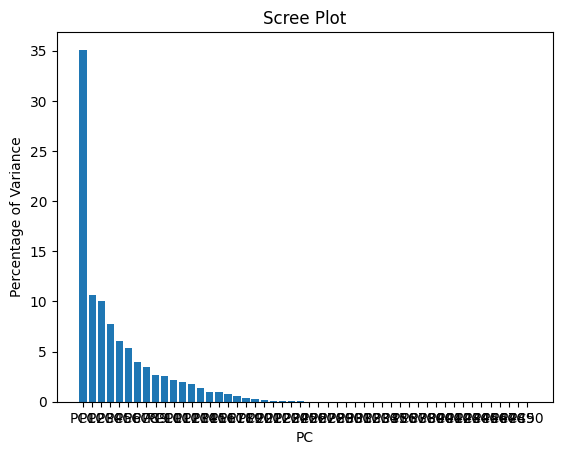

In [ ]:
#scree plot
per_var= np.round(pca.explained_variance_ratio_*100,decimals=1)


labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Variance')
plt.xlabel('PC')
plt.title('Scree Plot')

Concentration signature in 2D plane

Text(0, 0.5, 'PC2 10.6%')

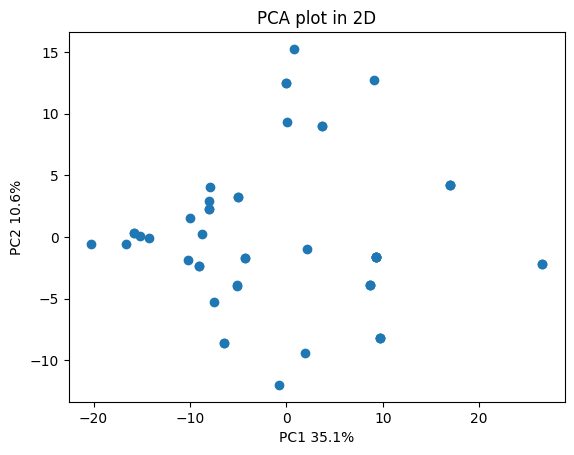

In [ ]:
#pca plot
pca_df= pd.DataFrame(pca_data,columns=labels,index=colnames_50)
# a dataframe with pcs in columns and sample labels in rows

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA plot in 2D')
plt.xlabel(f'PC1 {per_var[0]}%')
plt.ylabel(f'PC2 {per_var[1]}%')



Text(0.5, 0, 'PC3 10.0%')

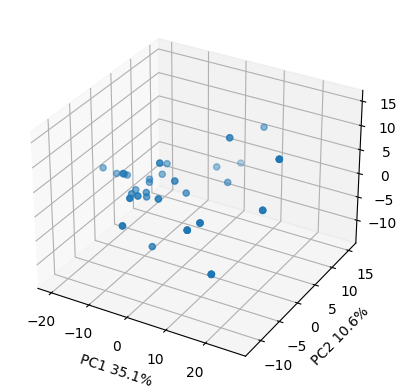

In [ ]:
#3d pca plot
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter3D(pca_df.PC1, pca_df.PC2,pca_df.PC3)
ax.set_xlabel(f'PC1 {per_var[0]}%')
ax.set_ylabel(f'PC2 {per_var[1]}%')
ax.set_zlabel(f'PC3 {per_var[2]}%')